In [1]:
import os

import pandas as pd
import geopandas as gpd

import numpy as np

import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt


In [2]:
sns.set_style('darkgrid')

## Análise Descritiva e Exploratória de Dados

In [7]:
df = pd.read_csv('../data/pam/output/cafe/pam_cafe.csv', sep = ",", low_memory=False)

### São Paulo

In [9]:
df['MOEDA_VIGENTE'] = df['MOEDA_VIGENTE'].str.strip()
df["ANO"] = df["ANO"].astype(np.int64)
df["MUNICIPIO"] = df["MUNICIPIO"].str.replace("PariqueraAçu", "Pariquera-Açu")
pam_sp = df[df["CODIGO_UF"] == 35]
pam_sp.insert(10, "AREA_PERDIDA", pam_sp["AREA_PLANTADA"] - pam_sp["AREA_COLHIDA"])


In [10]:
pam_sp[["AREA_PLANTADA", "AREA_COLHIDA", "AREA_PERDIDA", "QUANTIDADE_PRODUZIDA", "RENDIMENTO_MED_PRODUCAO", "VALOR_PRODUCAO"]].describe()

,AREA_PLANTADA,AREA_COLHIDA,AREA_PERDIDA,QUANTIDADE_PRODUZIDA,RENDIMENTO_MED_PRODUCAO,VALOR_PRODUCAO
count,13392.000000,19757.000000,13376.000000,19757.000000,19754.000000,1.976100e+04
mean,673.681004,947.190009,0.340685,1162.201346,1184.211147,1.570147e+05
std,1449.147910,1692.259139,10.316714,2473.552779,676.434595,1.172258e+06
min,0.000000,0.000000,0.000000,0.000000,33.000000,0.000000e+00
25%,31.000000,47.000000,0.000000,43.000000,720.000000,1.800000e+02
50%,143.500000,255.000000,0.000000,240.000000,1076.000000,1.400000e+03
75%,600.000000,1040.000000,0.000000,1098.000000,1500.000000,1.915400e+04
max,15200.000000,20441.000000,750.000000,48600.000000,12500.000000,6.894630e+07


In [11]:
pam_sp_anual = pam_sp.groupby(["ANO", "MOEDA_VIGENTE"]).agg('sum').reset_index()[["ANO", "MOEDA_VIGENTE", "AREA_PLANTADA", "AREA_COLHIDA", "AREA_PERDIDA", "QUANTIDADE_PRODUZIDA", "RENDIMENTO_MED_PRODUCAO", "VALOR_PRODUCAO"]]

In [13]:
pam_sp_anual.head(10)

,ANO,MOEDA_VIGENTE,AREA_PLANTADA,AREA_COLHIDA,AREA_PERDIDA,QUANTIDADE_PRODUZIDA,RENDIMENTO_MED_PRODUCAO,VALOR_PRODUCAO
0,1974,Mil Cruzeiros,0.0,641000.0,0.0,1160000.0,774663.0,3076221.0
1,1975,Mil Cruzeiros,0.0,690841.0,0.0,887000.0,584753.0,4095001.0
2,1976,Mil Cruzeiros,0.0,405550.0,0.0,220000.0,263496.0,2241844.0
3,1977,Mil Cruzeiros,0.0,637100.0,0.0,903881.0,614152.0,13702611.0
4,1978,Mil Cruzeiros,0.0,736459.0,0.0,1017969.0,591807.0,16577439.0
5,1979,Mil Cruzeiros,0.0,794870.0,0.0,1023350.0,576596.0,23686269.0
6,1980,Mil Cruzeiros,0.0,805060.0,0.0,824040.0,472049.0,34454062.0
7,1981,Mil Cruzeiros,0.0,907696.0,0.0,1218252.0,597852.0,81640992.0
8,1982,Mil Cruzeiros,0.0,555996.0,0.0,674400.0,566692.0,87088618.0
9,1983,Mil Cruzeiros,0.0,649747.0,0.0,798286.0,549220.0,235151296.0


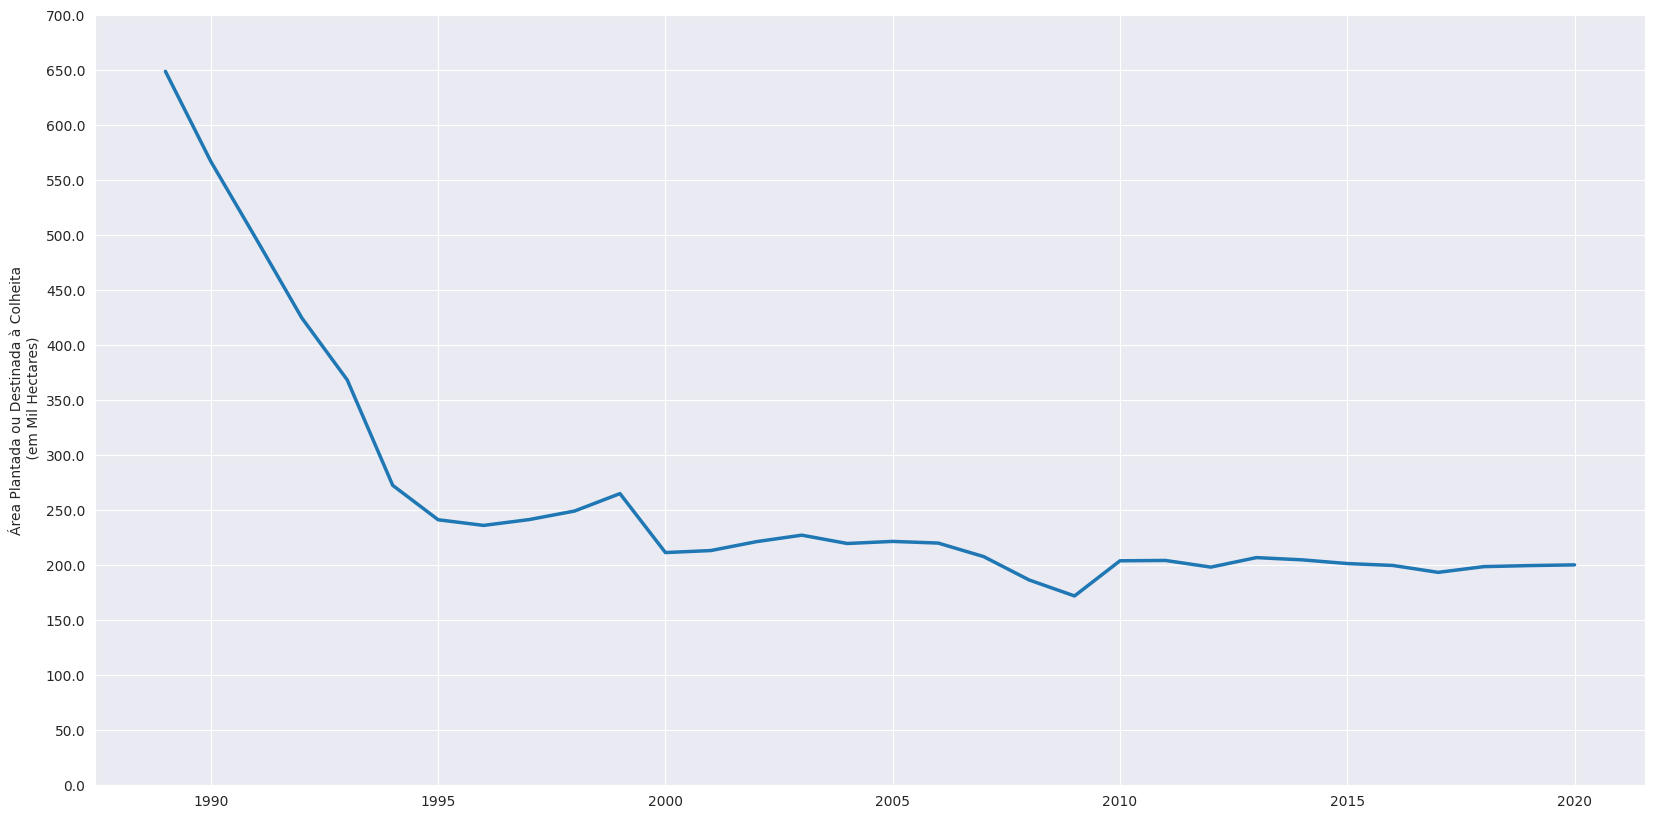

In [14]:
plt.figure(figsize=(20,10))
g1 = sns.lineplot(data=pam_sp_anual[pam_sp_anual["ANO"] > 1988], x = "ANO", y = "AREA_PLANTADA", linewidth = 2.5)
g1.set(ylabel='Área Plantada ou Destinada à Colheita\n (em Mil Hectares)', xlabel='',
  xticks=range(1990, 2025, 5), yticks=range(0,75*10**4, 5*10**4))
plt.yticks(g1.get_yticks(), g1.get_yticks() / 1000);

#title="Área Plantada ou Destinada à Colheita por Ano \n 1988 até 2020",

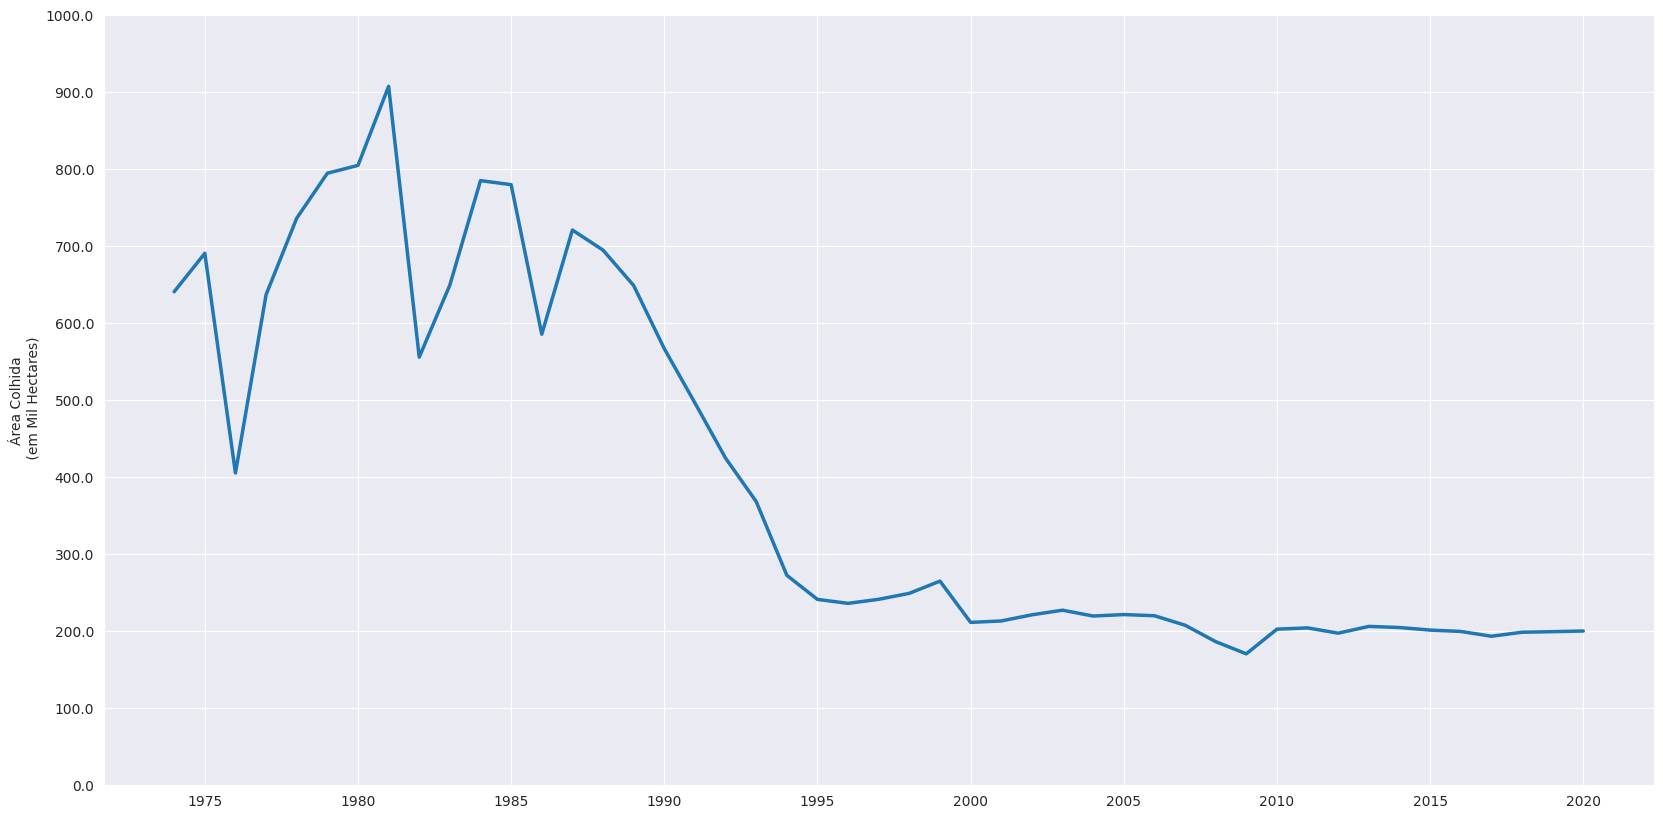

In [15]:
plt.figure(figsize=(20,10))
g1 = sns.lineplot(data=pam_sp_anual, x = "ANO", y = "AREA_COLHIDA", linewidth = 2.5)
g1.set(ylabel='Área Colhida\n (em Mil Hectares)', xlabel='', xticks=range(1975, 2025, 5), yticks=range(0,11*10**5, 10**5))
plt.yticks(g1.get_yticks(), g1.get_yticks() / 1000);

#title="Área Colhida por Ano \n 1974 até 2020",

In [16]:
pam_sp_anual[pam_sp_anual["ANO"] >= 2000][["ANO", "AREA_PLANTADA", "AREA_COLHIDA"]]

,ANO,AREA_PLANTADA,AREA_COLHIDA
26,2000,211552.0,211552.0
27,2001,213400.0,213400.0
28,2002,221456.0,221380.0
29,2003,227380.0,227380.0
30,2004,219800.0,219800.0
31,2005,221700.0,221700.0
32,2006,220186.0,220186.0
33,2007,207914.0,207914.0
34,2008,186667.0,186544.0
35,2009,172115.0,170702.0


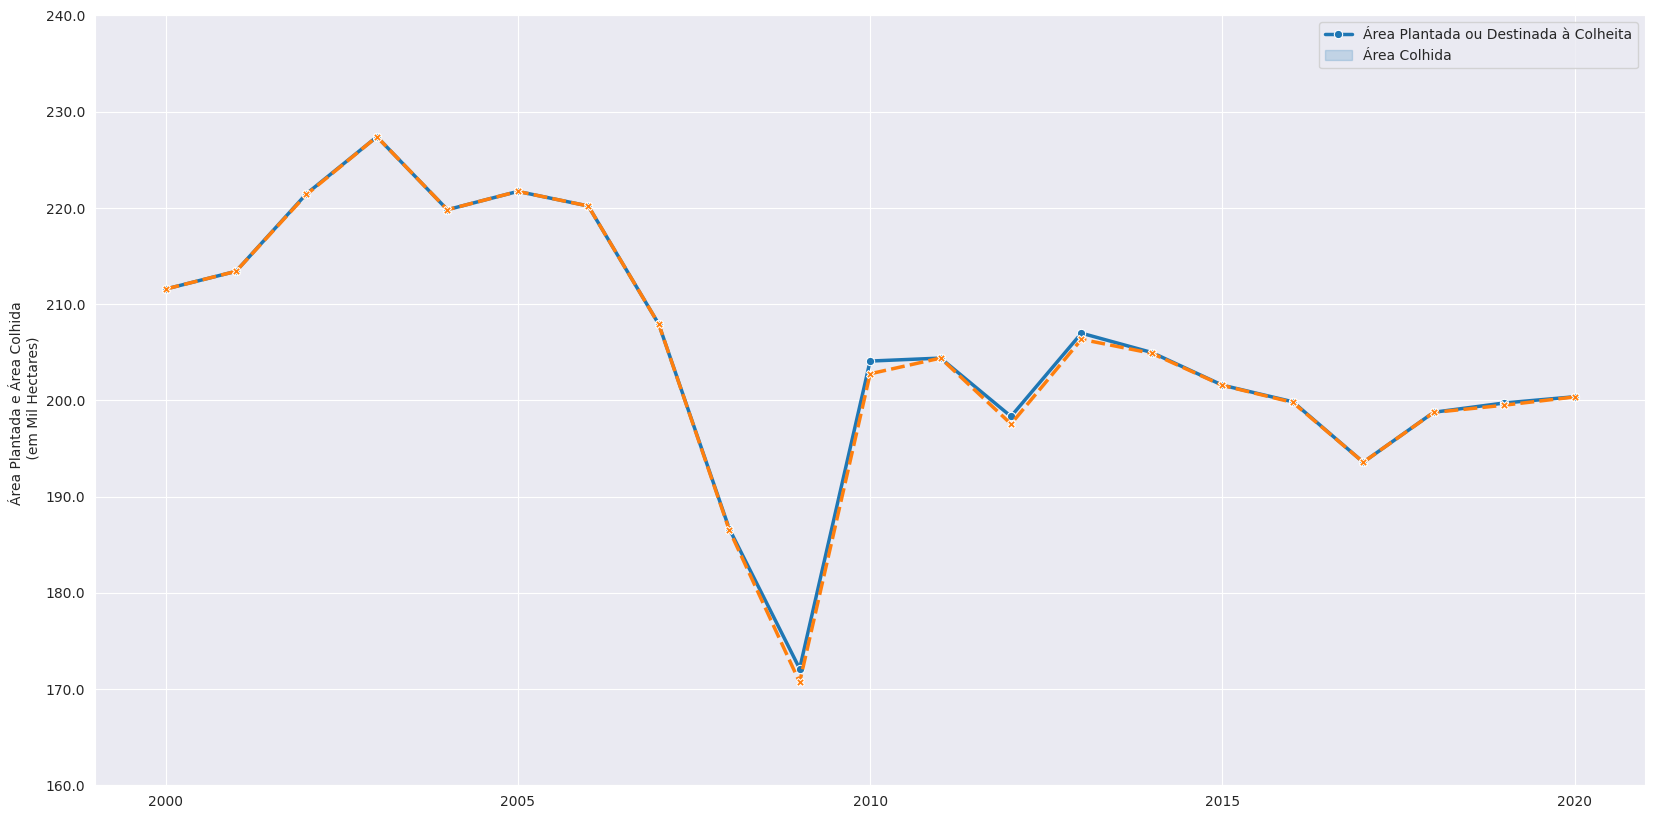

In [17]:
plt.figure(figsize=(20,10))
g1 = sns.lineplot(data=pam_sp_anual[pam_sp_anual["ANO"] >= 2000][["ANO", "AREA_PLANTADA", "AREA_COLHIDA"]].melt('ANO'),
 x = "ANO", y = "value", hue = "variable", style = "variable", markers=True, linewidth = 2.5)
g1.set(ylabel='Área Plantada e Área Colhida \n (em Mil Hectares)', xlabel='',
  xticks = range(2000, 2025, 5))
g1.legend(labels = ["Área Plantada ou Destinada à Colheita", "Área Colhida"])
plt.yticks(g1.get_yticks(), g1.get_yticks() / 1000);
#title="Área Plantada e Área Colhida por Ano \n 2000 até 2020",

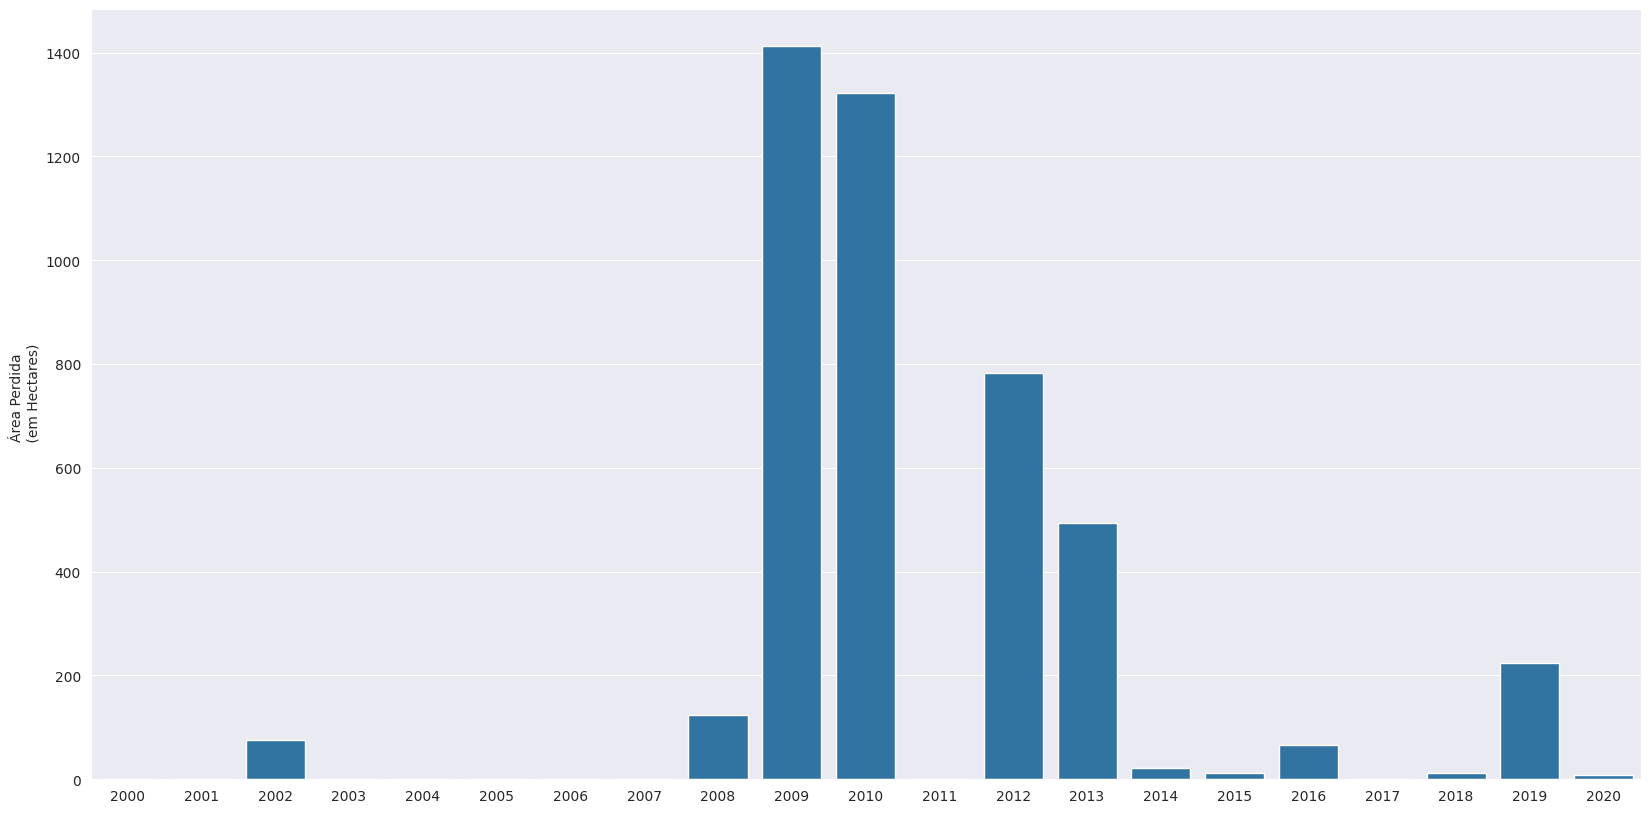

In [18]:
plt.figure(figsize=(20,10))
g1 = sns.barplot(data=pam_sp_anual[pam_sp_anual["ANO"] >= 2000], x = "ANO", y = "AREA_PERDIDA")
g1.set(ylabel='Área Perdida \n (em Hectares)', xlabel='');

#title="Área Perdida por Ano \n 2000 até 2020"

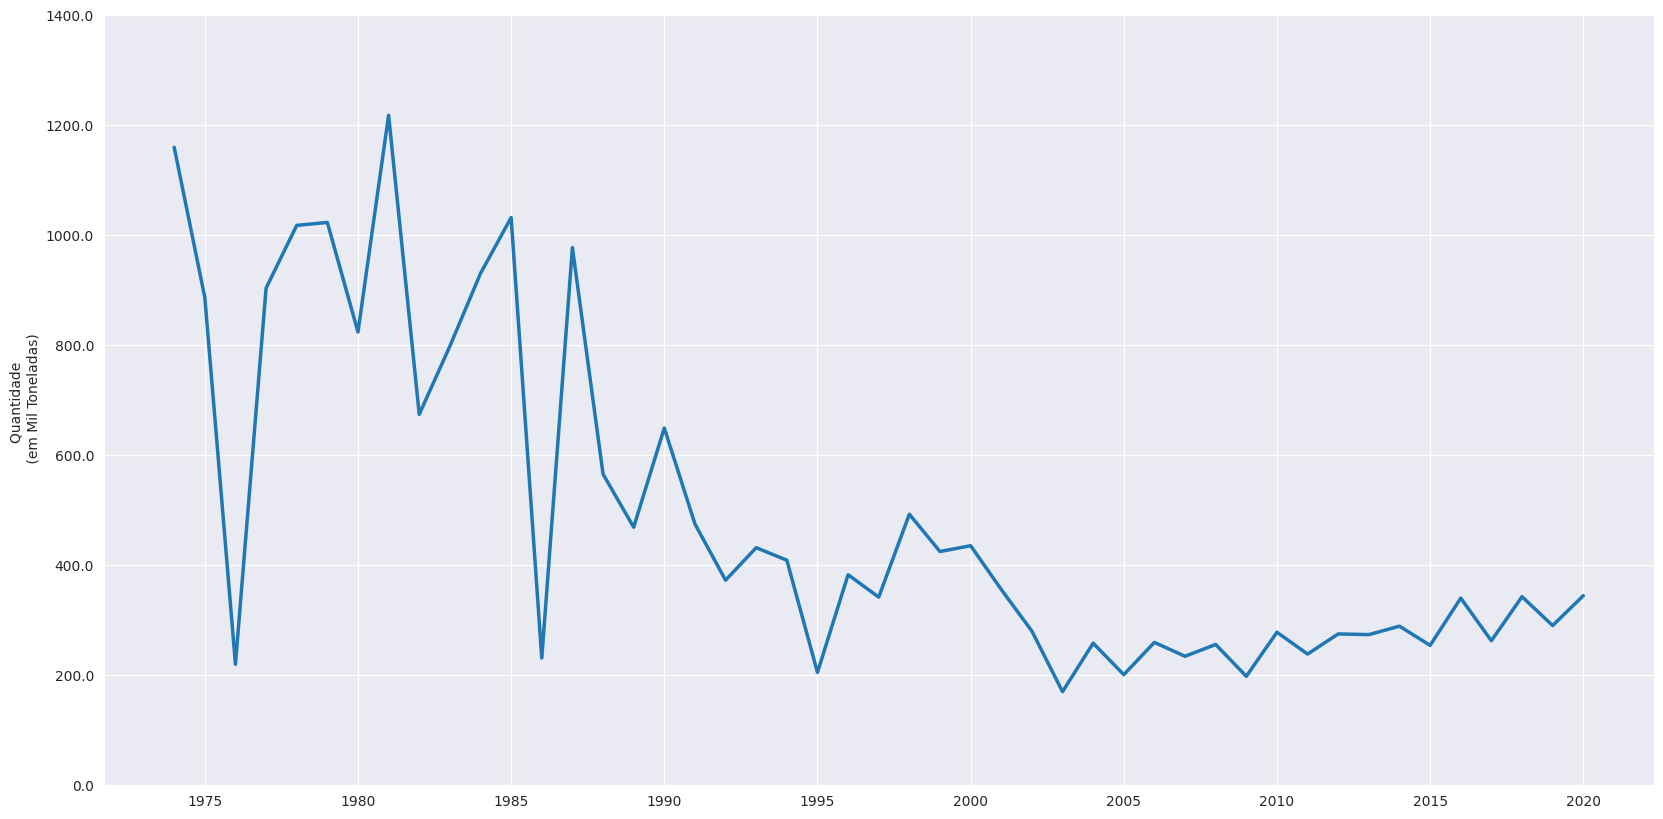

In [19]:
plt.figure(figsize=(20,10))
g1 = sns.lineplot(data=pam_sp_anual, x = "ANO", y = "QUANTIDADE_PRODUZIDA", linewidth = 2.5)
g1.set(ylabel='Quantidade \n (em Mil Toneladas)', xlabel='',  xticks=range(1975, 2025, 5))
plt.yticks(g1.get_yticks(), g1.get_yticks() / 1000);
#plt.yscale("log")
#title="Quantidade Produzida por Ano \n 1974 até 2020",

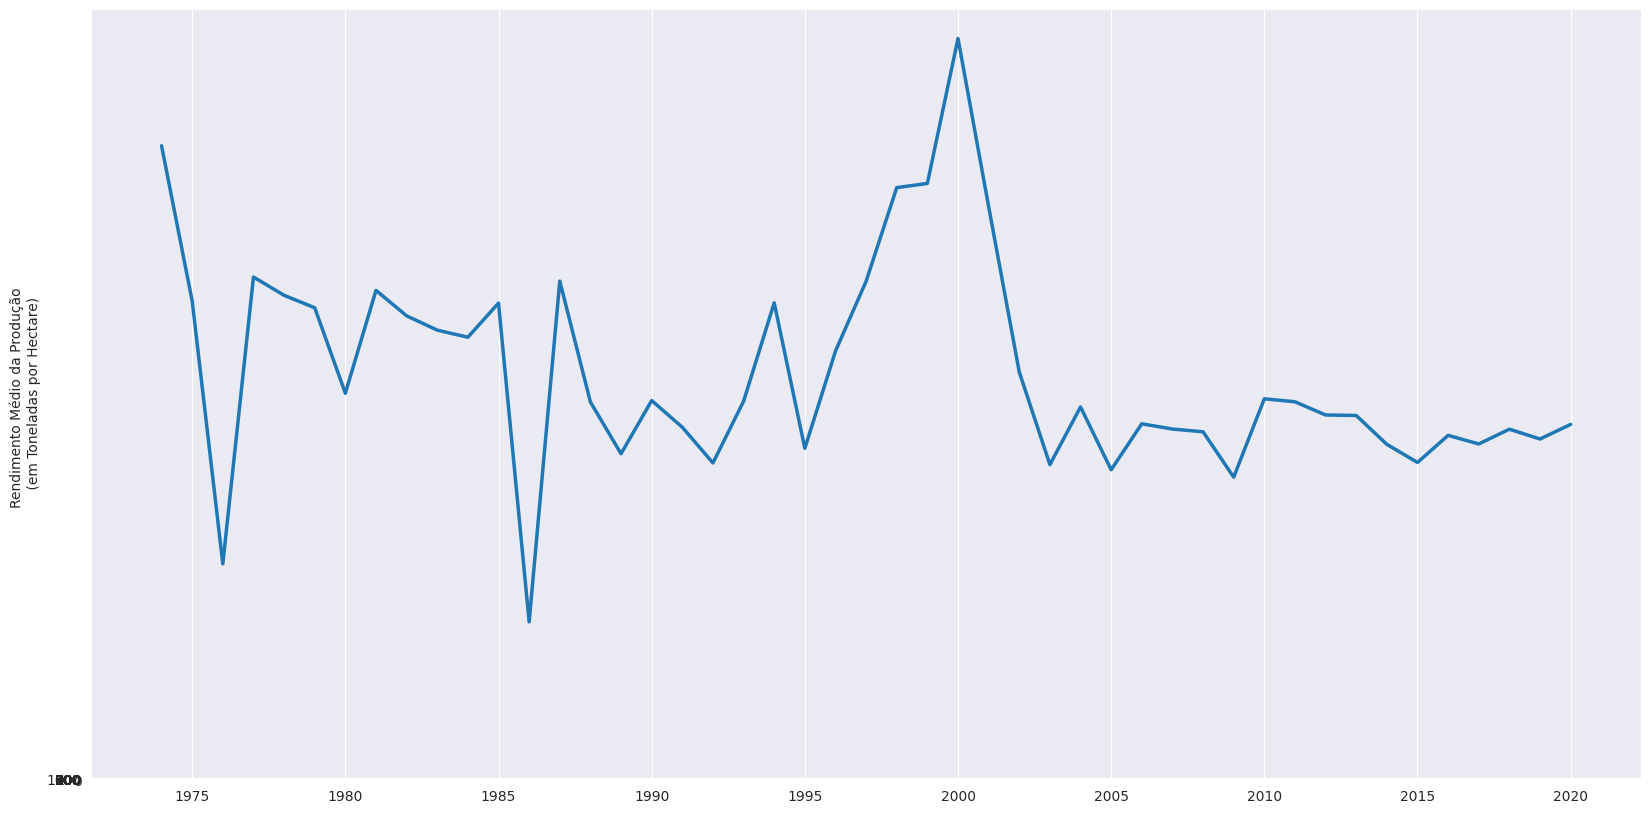

In [20]:
plt.figure(figsize=(20,10))
g1 = sns.lineplot(data=pam_sp_anual, x = "ANO", y = "RENDIMENTO_MED_PRODUCAO", linewidth = 2.5)
g1.set(ylabel='Rendimento Médio da Produção \n (em Toneladas por Hectare)', xlabel='',
 xticks=range(1975, 2025, 5), yticks=range(0,1100, 100));
# title="Rendimento Médio da Produção por Ano \n 1974 até 2020",

/tmp/ipykernel_14976/1864566041.py:2: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  g1=sns.pointplot(data=pam_sp_anual, x = "ANO", y = "VALOR_PRODUCAO",
/tmp/ipykernel_14976/1864566041.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g1.set_xticklabels(g1.get_xticklabels(), rotation=30)


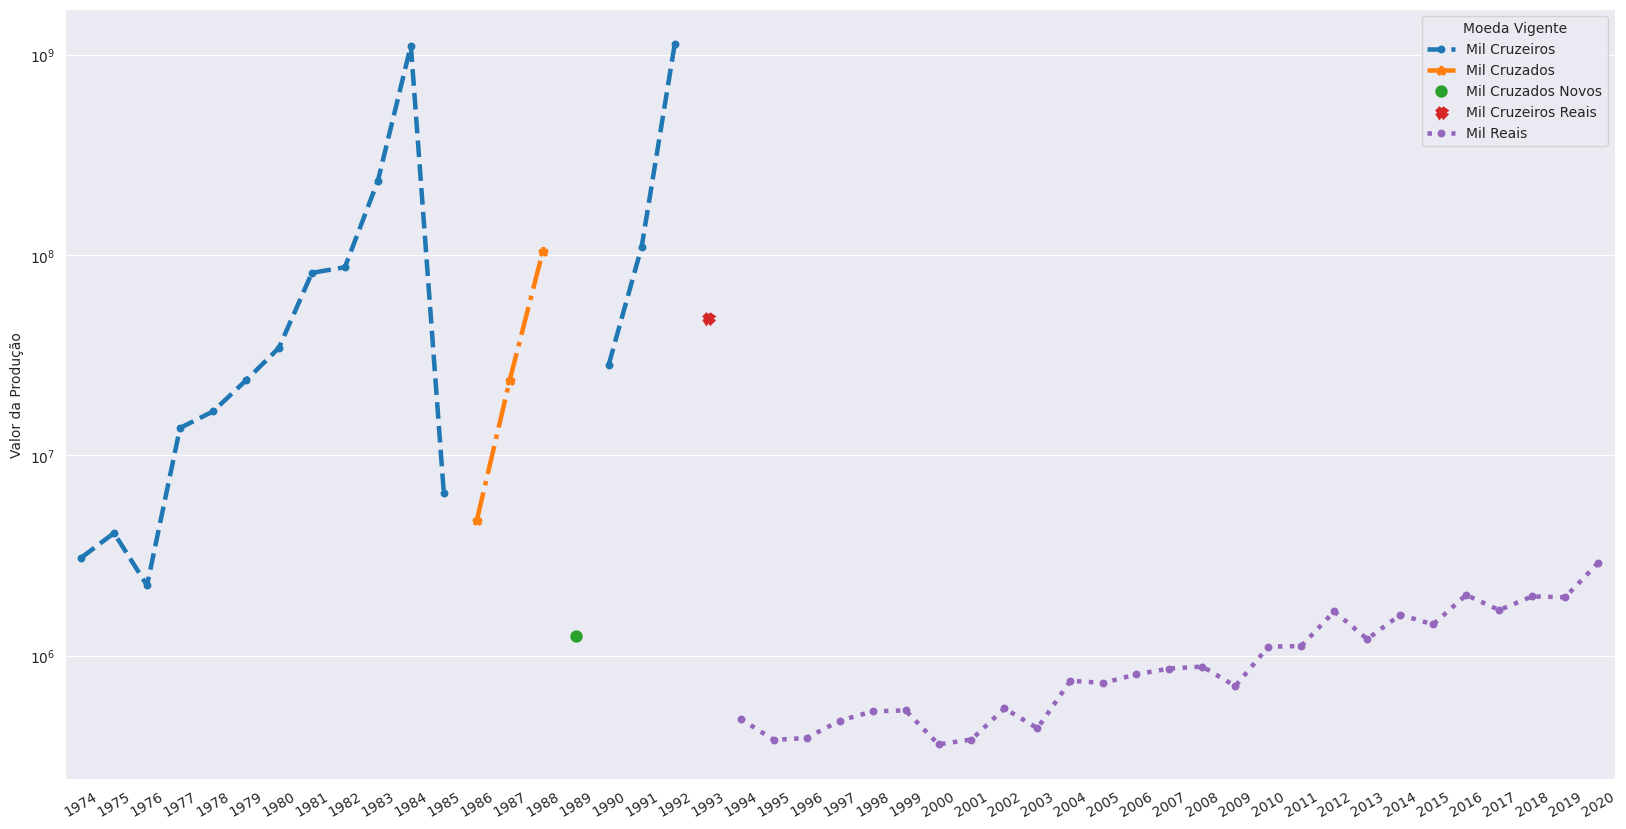

In [21]:
plt.figure(figsize=(20,10))
g1=sns.pointplot(data=pam_sp_anual, x = "ANO", y = "VALOR_PRODUCAO",
 markers=[".", "*", 'o', 'X', '.'], hue="MOEDA_VIGENTE", linestyles=["--", "-.", "None", "None", "dotted"], scale=1.2)
g1.set(ylabel='Valor da Produção', xlabel='')
g1.set_xticklabels(g1.get_xticklabels(), rotation=30)
g1.legend(title="Moeda Vigente")
plt.yscale('log');
#, title="Valor da Produção por Ano \n 1974 até 2020"